# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as skPCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Implement PCA

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## PCA with built-in function (scikit-learn)

In [7]:
pca_builtin = skPCA(n_components=4)
X_pca_builtin = pca_builtin.fit_transform(X_std)

print("Explained variance ratio (built-in PCA):")
print(pca_builtin.explained_variance_ratio_)


Explained variance ratio (built-in PCA):
[0.72962445 0.22850762 0.03668922 0.00517871]


## PCA without built-in function

In [8]:
def pca_manual(X, n_components):
    # Compute covariance matrix
    cov_mat = np.cov(X.T)
    # Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    # Sort eigenvalues and eigenvectors descending
    sorted_idx = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_idx]
    sorted_eigenvectors = eigen_vectors[:, sorted_idx]
    # Select top components
    eigenvector_subset = sorted_eigenvectors[:, :n_components]
    # Transform data
    X_reduced = np.dot(X, eigenvector_subset)
    # Explained variance ratio
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    return X_reduced, explained_variance_ratio[:n_components]

X_pca_manual, explained_var_ratio_manual = pca_manual(X_std, 4)

print("Explained variance ratio (manual PCA):")
print(explained_var_ratio_manual)

Explained variance ratio (manual PCA):
[0.72962445 0.22850762 0.03668922 0.00517871]


## Compare explained variance ratios of components 1 to 4

In [9]:
comparison = pd.DataFrame({
    'Component': np.arange(1, 5),
    'Explained Variance Built-in': pca_builtin.explained_variance_ratio_[:4],
    'Explained Variance Manual': explained_var_ratio_manual[:4]
})
print("\nComparison of explained variance ratios:")
print(comparison)

print("\nDiscussion:")
print("Both built-in and manual PCA yield nearly identical explained variance ratios,")
print("confirming the correctness of the manual implementation. The first few components")
print("capture the majority of variance, enabling effective dimensionality reduction.")


Comparison of explained variance ratios:
   Component  Explained Variance Built-in  Explained Variance Manual
0          1                     0.729624                   0.729624
1          2                     0.228508                   0.228508
2          3                     0.036689                   0.036689
3          4                     0.005179                   0.005179

Discussion:
Both built-in and manual PCA yield nearly identical explained variance ratios,
confirming the correctness of the manual implementation. The first few components
capture the majority of variance, enabling effective dimensionality reduction.


# Linear SVM and Hyperplane Plot

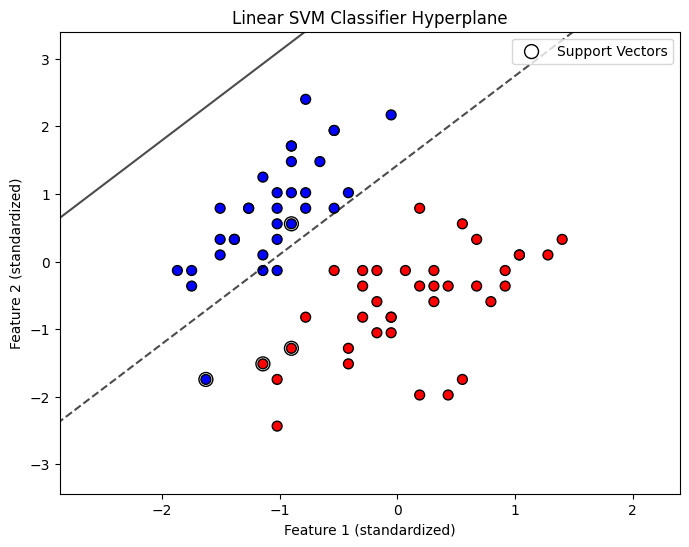

In [10]:
X_binary = X_std[y != 2]
y_binary = y[y != 2]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Train linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Plot hyperplane and support vectors (using only first two features for visualization)
def plot_svm_hyperplane(X, y, model):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
    plt.xlabel('Feature 1 (standardized)')
    plt.ylabel('Feature 2 (standardized)')
    plt.title('Linear SVM Classifier Hyperplane')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Create grid of points with zeros for features beyond first two
    grid_points = np.c_[XX.ravel(), YY.ravel(), np.zeros((XX.size, X.shape[1]-2))]
    Z = model.decision_function(grid_points)
    Z = Z.reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'], alpha=0.7)

    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.show()

plot_svm_hyperplane(X_train, y_train, svm)